In [1]:
import matplotlib.pyplot as plt
from model.run import run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (300, 1, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
False
item 1 was sold to ARM for 6.79
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round
no sale to ARM this round
no purchase from ARM this round


In [11]:
df.head()

,items,model,reserve,run,simulation,subset,substep,timestep,attributes_counts
3,{0: <model.model.items.Item object at 0x1a10ba...,<model.model.learning.Model object at 0x1a10ba...,3.21,1,0,0,3,1,"[1, 1, 2, 1, 1, 2, 2, 1, 2, 1]"
6,{0: <model.model.items.Item object at 0x1a10ba...,<model.model.learning.Model object at 0x1a10ba...,3.21,1,0,0,3,2,"[2, 1, 2, 1, 2, 3, 3, 2, 3, 1]"
9,{0: <model.model.items.Item object at 0x1a10bc...,<model.model.learning.Model object at 0x1a10bc...,3.21,1,0,0,3,3,"[2, 2, 2, 1, 3, 3, 4, 2, 3, 2]"
12,{0: <model.model.items.Item object at 0x1a10bc...,<model.model.learning.Model object at 0x1a10bc...,3.21,1,0,0,3,4,"[3, 3, 3, 1, 3, 3, 4, 2, 3, 2]"
15,{0: <model.model.items.Item object at 0x1a10bc...,<model.model.learning.Model object at 0x1a10bc...,3.21,1,0,0,3,5,"[4, 4, 4, 1, 3, 3, 5, 3, 4, 3]"


Text(0.5,0,'time')

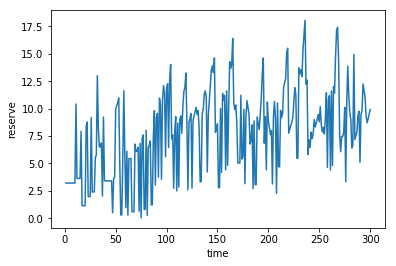

In [3]:
plt.plot(df.timestep, df.reserve)
plt.ylabel("reserve")
plt.xlabel("time")

Text(0.5,0,'time')

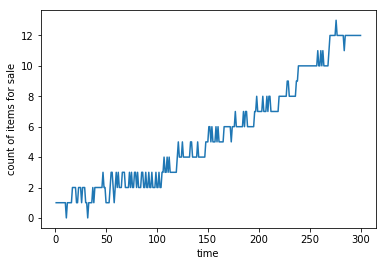

In [4]:
plt.plot(df.timestep, df['items'].apply(lambda x: len([x[k] for k in x if x[k].for_sale ])))
plt.ylabel("count of items for sale")
plt.xlabel("time")

In [5]:
attr= [i.attributes for i in df.iloc[-1]['items'].values()]
model = df.iloc[-1]['model']

In [6]:
arm_prices = [model.predict(a) for a in attr]

Text(0,0.5,'price')

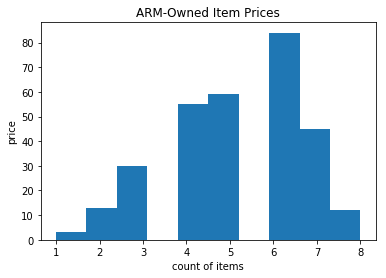

In [12]:
plt.hist(arm_prices)
plt.title("ARM-Owned Item Prices")
plt.xlabel("count of items")
plt.ylabel("price")

In [ ]:

plt.hist(arm_prices)
plt.title("ARM-Owned Item Prices")
plt.xlabel("count of items")
plt.ylabel("price")

In [8]:
df['attributes_counts']= df['items'].apply(lambda x: [x[k].attributes for k in x] ).apply(lambda z: np.array([z[i] for i in range(len(z))]).sum(axis=0))

In [9]:
list(df.attributes_counts.values.T)

[array([1, 1, 2, 1, 1, 2, 2, 1, 2, 1]),
 array([2, 1, 2, 1, 2, 3, 3, 2, 3, 1]),
 array([2, 2, 2, 1, 3, 3, 4, 2, 3, 2]),
 array([3, 3, 3, 1, 3, 3, 4, 2, 3, 2]),
 array([4, 4, 4, 1, 3, 3, 5, 3, 4, 3]),
 array([5, 5, 4, 2, 4, 3, 6, 4, 4, 4]),
 array([5, 5, 5, 2, 4, 4, 6, 5, 4, 4]),
 array([6, 5, 6, 2, 5, 5, 7, 5, 4, 5]),
 array([6, 5, 6, 3, 5, 6, 8, 6, 5, 6]),
 array([6, 6, 7, 3, 6, 6, 8, 7, 6, 7]),
 array([7, 7, 8, 3, 7, 6, 8, 8, 6, 8]),
 array([8, 8, 8, 4, 7, 7, 9, 8, 7, 9]),
 array([ 8,  8,  8,  5,  8,  7, 10,  8,  7,  9]),
 array([ 8,  9,  8,  5,  8,  7, 11,  9,  7,  9]),
 array([ 8, 10,  8,  6,  8,  8, 12,  9,  8,  9]),
 array([ 9, 10,  8,  6,  8,  8, 12,  9,  8,  9]),
 array([ 9, 11,  8,  7,  8,  9, 13, 10,  8,  9]),
 array([10, 12,  9,  7,  8,  9, 14, 11,  8,  9]),
 array([10, 13,  9,  8,  8, 10, 15, 12,  9, 10]),
 array([11, 14, 10,  8,  8, 11, 16, 13,  9, 10]),
 array([12, 15, 10,  9,  9, 12, 16, 13, 10, 11]),
 array([12, 15, 11, 10,  9, 13, 16, 14, 11, 11]),
 array([12, 15, 11, 

Text(0,0.5,'count')

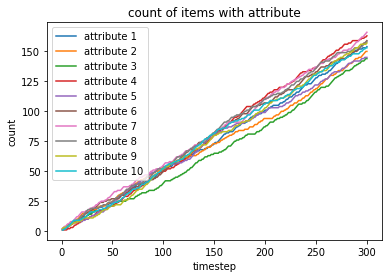

In [10]:
plt.plot(df.timestep,list(df.attributes_counts.values.T))
plt.title('count of items with attribute')
plt.legend(["attribute "+str(i+1) for i in range(10)])
plt.xlabel('timestep')
plt.ylabel('count')

Notes:
- buying and selling are happening, with the current setup we're seeing more selling than buying
- this is a pretty realistic null model since we would absolutelt expect people to dump on a market like this, the only way it might survive is if it can learn to value things appropriately

immediate ToDos (debugging scaffold) :DONE:
- fix key error :DONE:
- make sure trades trigger as expected :DONE

New next steps:
- build instrumentation to evaluate the relationship between the private prices and the arm prices

harder ToDo:
- revist the "learning" algorithm and come up with an invariant preserving mechanism such that trades manifest the updated price and the whole system can be interpreted as signal processing!